### nltk

In [28]:
import nltk
from nltk.corpus import stopwords
nltk.download('book', quiet=True)
from nltk.book import *
from nltk.tokenize import RegexpTokenizer, WordPunctTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [29]:
#목록 확인
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

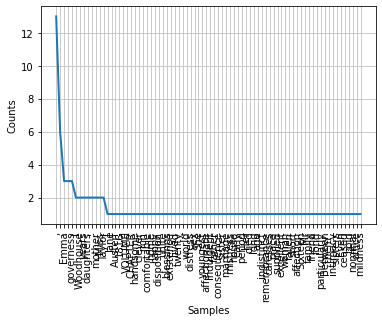

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
#데이터 생성
data = nltk.corpus.gutenberg.raw('austen-emma.txt')
#데이터 1000개까지
data = data[:1000]
#단어 단위 토크나이징
tokenizer = WordPunctTokenizer() #띄어쓰기 단위 토크나이징
data = tokenizer.tokenize(data)
#불용어 제거
data = [each_word for each_word in data if each_word not in stopwords.words()]
#단어 별 언급 빈도 확인
data_cnt = Counter(data)
data_cnt = dict(data_cnt)
#시각화(그래프)
data_graph = nltk.Text(data, name='word count')
data_graph.plot()

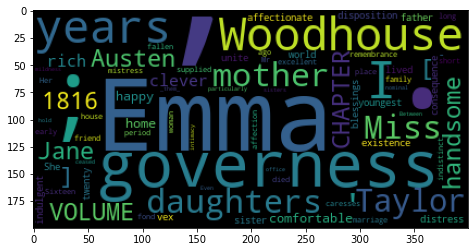

In [31]:
#워드 클라우드 그리기
wordcloud = WordCloud().generate_from_frequencies(data_cnt)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

#### 한국어 형태소 분석시

- Hannaum
- Kma
- Komoran
- Mecab
- Okt

In [32]:
from konlpy.tag import Okt

In [33]:
okt = Okt()
data = '오늘 날씨가 추워서 기분이 좋지 않다.'

#형태소 단위 분석
okt.morphs(data)

['오늘', '날씨', '가', '추워서', '기분', '이', '좋지', '않다', '.']

In [34]:
#명사 추출
okt.nouns(data)

['오늘', '날씨', '기분']

In [35]:
#어절 추출
okt.phrases(data)

['오늘', '오늘 날씨', '기분', '날씨']

In [36]:
#형태소 분석 - 품사 태깅
okt.pos(data)

[('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('추워서', 'Adjective'),
 ('기분', 'Noun'),
 ('이', 'Josa'),
 ('좋지', 'Adjective'),
 ('않다', 'Verb'),
 ('.', 'Punctuation')]

In [37]:
from collections import Counter
import pandas as pd
import numpy as np

### 단어 빈도 계산

In [38]:
df = pd.read_csv('ratings.txt', delimiter='\t')
x = df['document'][:1000]
n = []
for i in x :
    n.append(i)

In [39]:
okt = Okt()
noun = okt.nouns(str(n))
count = Counter(noun)
noun_list = count.most_common(10)
for v in noun_list :
    print(v)

('영화', 326)
('정말', 89)
('최고', 79)
('연기', 62)
('진짜', 58)
('감동', 58)
('생각', 47)
('이', 47)
('그', 39)
('것', 37)


### 단어리스트 만들기

In [40]:
word_list = df['document'][:3000]
tag = []
for s in word_list :
    morph = okt.pos(s)
    tag.append(morph)

#명사 추출
noun_list = []
for s in tag :
    for word, tag in s :
        if tag in ['Noun'] :
            noun_list.append(word)

### 두글자 이상 단어만 추출

In [41]:
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:10]

['보고', '지금', '다시', '디자인', '학생', '외국', '디자이너', '일군', '전통', '통해']

### 단어별 개수 세기

In [42]:
counts = Counter(noun_list)
tags = counts.most_common(1000)
tags

[('영화', 985),
 ('정말', 265),
 ('최고', 230),
 ('진짜', 184),
 ('감동', 155),
 ('연기', 142),
 ('생각', 140),
 ('드라마', 121),
 ('보고', 119),
 ('사람', 110),
 ('평점', 103),
 ('다시', 94),
 ('마지막', 80),
 ('사랑', 78),
 ('스토리', 69),
 ('작품', 67),
 ('지금', 66),
 ('배우', 65),
 ('명작', 61),
 ('재미', 59),
 ('마음', 56),
 ('하나', 54),
 ('완전', 53),
 ('이영화', 52),
 ('추천', 50),
 ('장면', 49),
 ('매력', 49),
 ('느낌', 47),
 ('감독', 47),
 ('내용', 46),
 ('현실', 46),
 ('액션', 45),
 ('이야기', 43),
 ('그냥', 43),
 ('가슴', 43),
 ('주인공', 42),
 ('정도', 42),
 ('이해', 40),
 ('한번', 40),
 ('인생', 38),
 ('역시', 37),
 ('음악', 37),
 ('처음', 36),
 ('기억', 35),
 ('여운', 35),
 ('남자', 34),
 ('눈물', 34),
 ('우리', 34),
 ('인간', 33),
 ('시간', 33),
 ('대박', 32),
 ('한국', 32),
 ('결말', 30),
 ('가족', 30),
 ('모습', 29),
 ('연기력', 29),
 ('최고다', 27),
 ('대한', 26),
 ('영상', 26),
 ('보기', 26),
 ('아이', 26),
 ('가장', 26),
 ('소재', 25),
 ('모든', 25),
 ('연출', 25),
 ('여자', 25),
 ('시리즈', 24),
 ('모두', 24),
 ('개인', 24),
 ('부분', 24),
 ('반전', 23),
 ('때문', 23),
 ('계속', 23),
 ('무엇', 23),
 ('당시', 22),
 ('공감

In [43]:
dic = dict(count.most_common(1000))
dic

{'영화': 326,
 '정말': 89,
 '최고': 79,
 '연기': 62,
 '진짜': 58,
 '감동': 58,
 '생각': 47,
 '이': 47,
 '그': 39,
 '것': 37,
 '때': 35,
 '보고': 34,
 '수': 34,
 '드라마': 33,
 '다시': 32,
 '내': 32,
 '점': 32,
 '거': 31,
 '사람': 30,
 '지금': 27,
 '더': 27,
 '평점': 26,
 '명작': 26,
 '마음': 25,
 '마지막': 25,
 '사랑': 24,
 '재미': 24,
 '스토리': 24,
 '하나': 23,
 '말': 23,
 '볼': 23,
 '나': 22,
 '작품': 22,
 '완전': 21,
 '현실': 21,
 '왜': 20,
 '배우': 20,
 '듯': 19,
 '느낌': 19,
 '남자': 19,
 '추천': 19,
 '뭐': 18,
 '매력': 17,
 '굿': 16,
 '중': 16,
 '한번': 15,
 '장면': 15,
 '이야기': 15,
 '난': 15,
 '감독': 15,
 '한국': 15,
 '저': 14,
 '꼭': 14,
 '액션': 14,
 '이영화': 14,
 '편': 14,
 '주인공': 13,
 '좀': 13,
 '역시': 12,
 '속': 12,
 '또': 12,
 '정도': 12,
 '대박': 12,
 '연기력': 12,
 '처음': 11,
 '대한': 11,
 '기대': 11,
 '알': 11,
 '인생': 11,
 '모습': 11,
 '개인': 11,
 '가장': 11,
 '이해': 10,
 '인간': 10,
 '최고다': 10,
 '음악': 10,
 '자신': 10,
 '내용': 10,
 '모든': 10,
 '대해': 10,
 '도': 9,
 '제': 9,
 '전': 9,
 '만': 9,
 '기억': 9,
 '여운': 9,
 '봄': 9,
 '그냥': 9,
 '가족': 9,
 '요': 9,
 '때문': 9,
 '이건': 9,
 '짱': 9,
 '계속': 9,
 '무

### 워드클라우드 생성

(-0.5, 595.5, 638.5, -0.5)

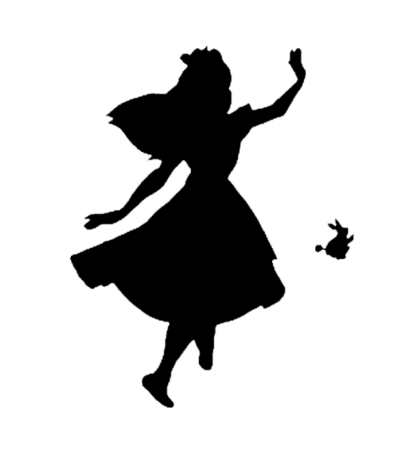

In [45]:
from PIL import Image #워드클라우드용 마스크를 생성하기위한 라이브러리
from wordcloud import WordCloud
import matplotlib.pyplot as plt

image_file = 'alice.png'
img_file = Image.open(image_file)
alice_mask = np.array(img_file)

plt.figure(figsize=(8,8))
plt.imshow(alice_mask)
plt.axis('off')

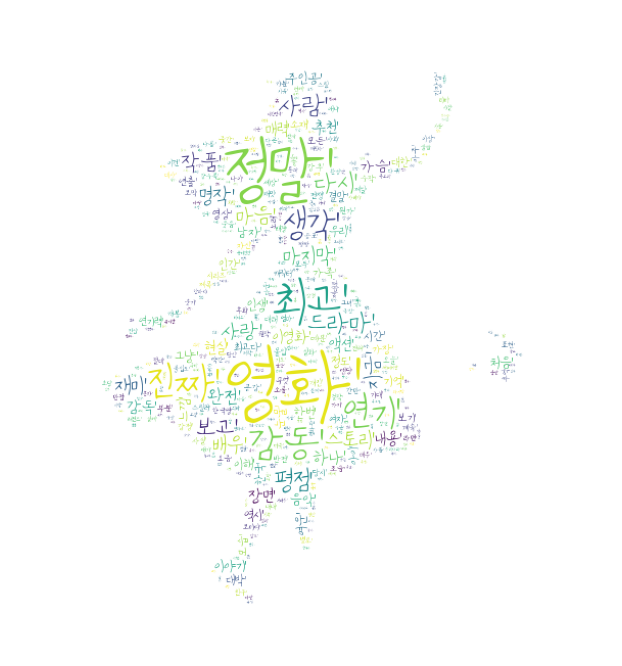

In [49]:
wordcloud = WordCloud(font_path='나눔손글씨 버드나무.ttf',
                      background_color='white',
                      max_words=1000,
                      mask=alice_mask)
wc = wordcloud.generate(str(tags))
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 네이버 평점 감성분류

#### 1. 목적
- 네이버 영화리뷰 데이터셋을 이용해서 긍정/부정 분류 모델을 만들어보자
- TF-IDF 적용해보기

#### 2.데이터수집
- 네이버 영화 리뷰 데이터 사용

In [51]:
import numpy as np
import pandas as pd

In [52]:
df = pd.read_csv('ratings.txt', delimiter='\t')
df.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


#### 3.데이터 전처리

In [56]:
#null값 삭제
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [58]:
x = df['document']
y = df['label']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)
#설정안해주면 trian 75, test 25 

In [60]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(149994,)
(149994,)
(49998,)
(49998,)


In [61]:
from konlpy.tag import Okt
okt = Okt()

In [62]:
#명사 토큰화
okt.nouns('오늘은 학교에 가는 날이에요.')

['오늘', '학교', '날']

In [63]:
def Tokenizer(text) :
    return okt.nouns(text)

In [65]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=Tokenizer)
#학습
tfidf.fit(x_train[:3])
#단어사전
tfidf.vocabulary_ 

c:\Users\82104\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'거': 3,
 '예전': 9,
 '감독': 2,
 '하나': 12,
 '사람': 6,
 '가지': 0,
 '갈피': 1,
 '캐릭터': 10,
 '마틴': 5,
 '프리': 11,
 '널': 4,
 '사랑': 7,
 '애기': 8}

#### pos tagging
- 문장을 토큰화 한 후 쪼개진 형태소에 품사를 부여하는 것

In [66]:
data = '오늘 날씨가 추워서 기분이 좋지않다.'
okt.morphs(data)

['오늘', '날씨', '가', '추워서', '기분', '이', '좋지', '않다', '.']

In [67]:
okt.pos(data)

[('오늘', 'Noun'),
 ('날씨', 'Noun'),
 ('가', 'Josa'),
 ('추워서', 'Adjective'),
 ('기분', 'Noun'),
 ('이', 'Josa'),
 ('좋지', 'Adjective'),
 ('않다', 'Verb'),
 ('.', 'Punctuation')]

In [68]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
def Tokenizer1(text):
    df = pd.DataFrame(okt.pos(text), columns=['morph', 'tag'])
    df.set_index('tag', inplace=True)
    
    #동사, 명사, 형용사일 때만 그 값을 반환
    if('Verb' in df.index) | ('Adjective' in df.index) | ('Noun' in df.index) :
        labels = ['Verb', 'Adjective', 'Noun']
        return df.loc[df.index.intersection(labels)]['morph'].values
    else :
        return []